<a href="https://colab.research.google.com/github/atharv2508/Ml_Project/blob/main/MLPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("diabetes.csv")


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

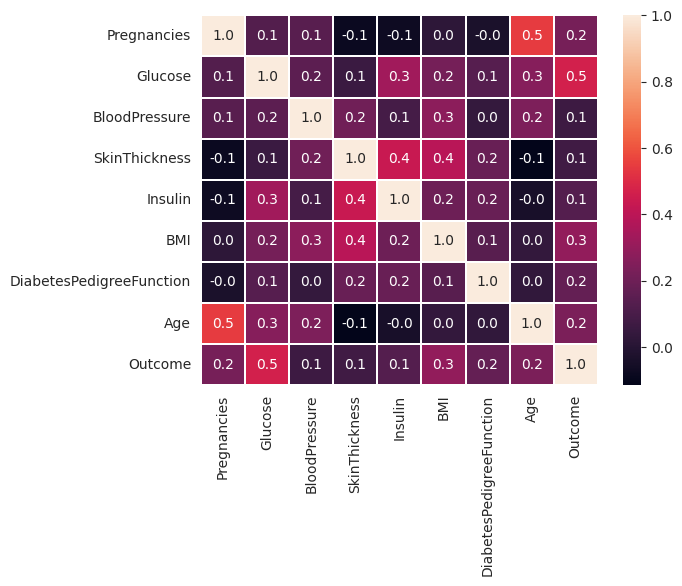

In [ ]:
sns.heatmap(df.corr(), annot= True, fmt='0.1f', linewidth=0.3)

In [ ]:
df.Outcome.value_counts()
# 0 - Not diabetic and 1-diabetic

,count
Outcome,
0,500
1,268


<Axes: xlabel='Outcome', ylabel='count'>

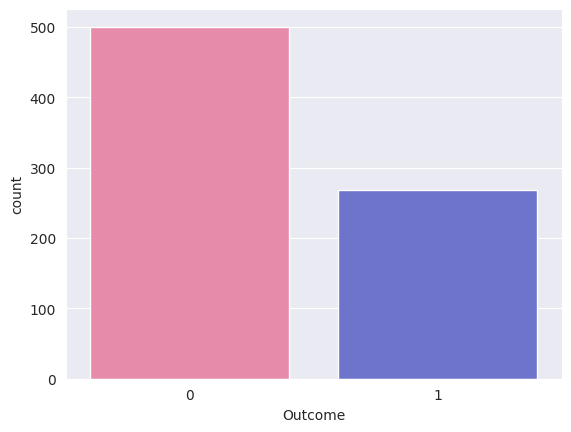

In [ ]:
sns.countplot(x= 'Outcome', data= df, palette=['#f57da5','#5e67db'])

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Separate features and target variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [ ]:
# Feature selection using SelectKBest with chi-squared test
best_features = SelectKBest(score_func=chi2, k=5)
fit = best_features.fit(X, y)

In [ ]:
# Get feature scores and select top k features
feature_scores = pd.DataFrame(fit.scores_)
feature_columns = pd.DataFrame(X.columns)
selected_features = pd.concat([feature_columns, feature_scores], axis=1)
selected_features.columns = ['Feature', 'Score']
selected_features = selected_features.nlargest(5, 'Score')

In [ ]:
print(selected_features)

       Feature        Score
4      Insulin  2175.565273
1      Glucose  1411.887041
7          Age   181.303689
5          BMI   127.669343
0  Pregnancies   111.519691


In [ ]:
# Feature selection using SelectKBest with chi-squared test
best_features = SelectKBest(score_func=chi2, k=3)
fit = best_features.fit(X, y)

In [ ]:
# Get feature scores and select top k features
feature_scores = pd.DataFrame(fit.scores_)
feature_columns = pd.DataFrame(X.columns)
selected_features = pd.concat([feature_columns, feature_scores], axis=1)
selected_features.columns = ['Feature', 'Score']
selected_features = selected_features.nlargest(3, 'Score')

In [ ]:
print(selected_features)

   Feature        Score
4  Insulin  2175.565273
1  Glucose  1411.887041
7      Age   181.303689


In [ ]:
x= df.drop('Outcome', axis=1)
y= df['Outcome']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.8,random_state=42)

In [ ]:
model1= LogisticRegression()
model2= SVC()
model3= KNeighborsClassifier()
model4=DecisionTreeClassifier()

In [ ]:
models =['LogisticRegression','SVC','KNeighborsClassifier','DecisionTreeClassifier']
result1=[]
result2=[]
result3=[]
result4=[]

In [ ]:
def my_model(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Accuracy =", accuracy_score(y_test,y_pred))
    print("precision_score =", precision_score(y_test,y_pred))
    print("recall =",recall_score(y_test, y_pred))
    print("f1_score =",f1_score(y_test,y_pred))

    result1.append(accuracy_score(y_test,y_pred))
    result2.append(precision_score(y_test,y_pred))
    result3.append(recall_score(y_test, y_pred))
    result4.append(f1_score(y_test,y_pred))
    print()
    print(model)
    sns.heatmap(confusion_matrix(y_pred,y_test), annot= True)

Accuracy = 0.7467532467532467
precision_score = 0.6379310344827587
recall = 0.6727272727272727
f1_score = 0.6548672566371682

LogisticRegression()


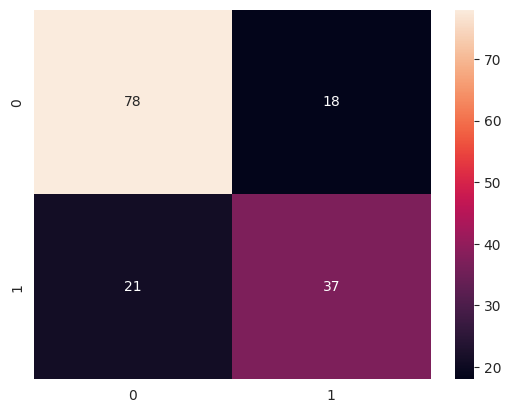

In [ ]:
my_model(model1)

Accuracy = 0.7662337662337663
precision_score = 0.7209302325581395
recall = 0.5636363636363636
f1_score = 0.6326530612244898

SVC()


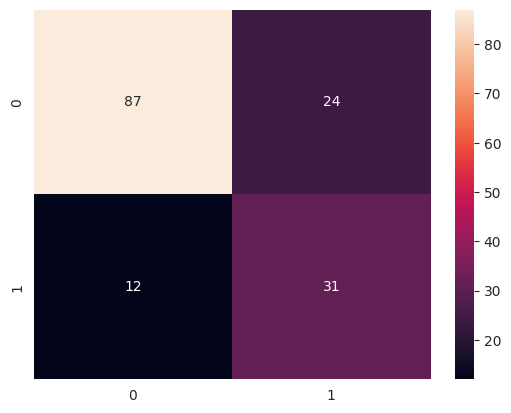

In [ ]:
my_model(model2)

Accuracy = 0.6623376623376623
precision_score = 0.5245901639344263
recall = 0.5818181818181818
f1_score = 0.5517241379310345

KNeighborsClassifier()


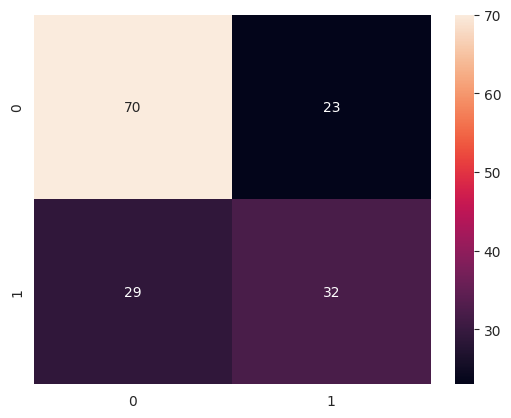

In [ ]:
my_model(model3)

Accuracy = 0.7597402597402597
precision_score = 0.640625
recall = 0.7454545454545455
f1_score = 0.6890756302521008

DecisionTreeClassifier()


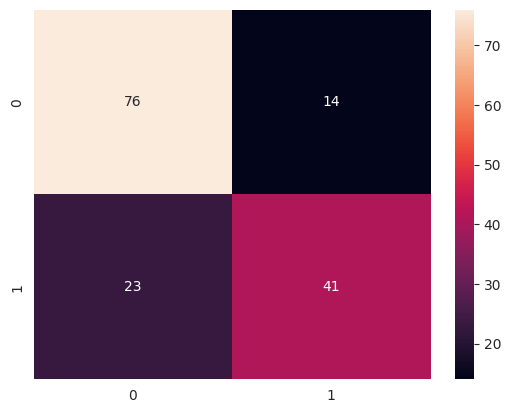

In [ ]:
my_model(model4)

In [ ]:
print("Length of models:", len(models))
print("Length of result1:", len(result1))
print("Length of result2:", len(result2))
print("Length of result3:", len(result3))
print("Length of result4:", len(result4))

Length of models: 4
Length of result1: 4
Length of result2: 4
Length of result3: 4
Length of result4: 4


In [ ]:
# Truncate result lists to match the length of models list
result1 = result1[:len(models)]
result2 = result2[:len(models)]
result3 = result3[:len(models)]
result4 = result4[:len(models)]


In [ ]:
# Ensure all lists have the same length
assert len(models) == len(result1) == len(result2) == len(result3) == len(result4)

In [ ]:
models_df = pd.DataFrame({
    'Algorithm': models,
    'Accuracy': result1,
    'precision': result2,
    'recall':result3,
    'f1_score': result4
})
models_df

,Algorithm,Accuracy,precision,recall,f1_score
0,LogisticRegression,0.746753,0.637931,0.672727,0.654867
1,SVC,0.766234,0.720930,0.563636,0.632653
2,KNeighborsClassifier,0.662338,0.524590,0.581818,0.551724
3,DecisionTreeClassifier,0.759740,0.640625,0.745455,0.689076


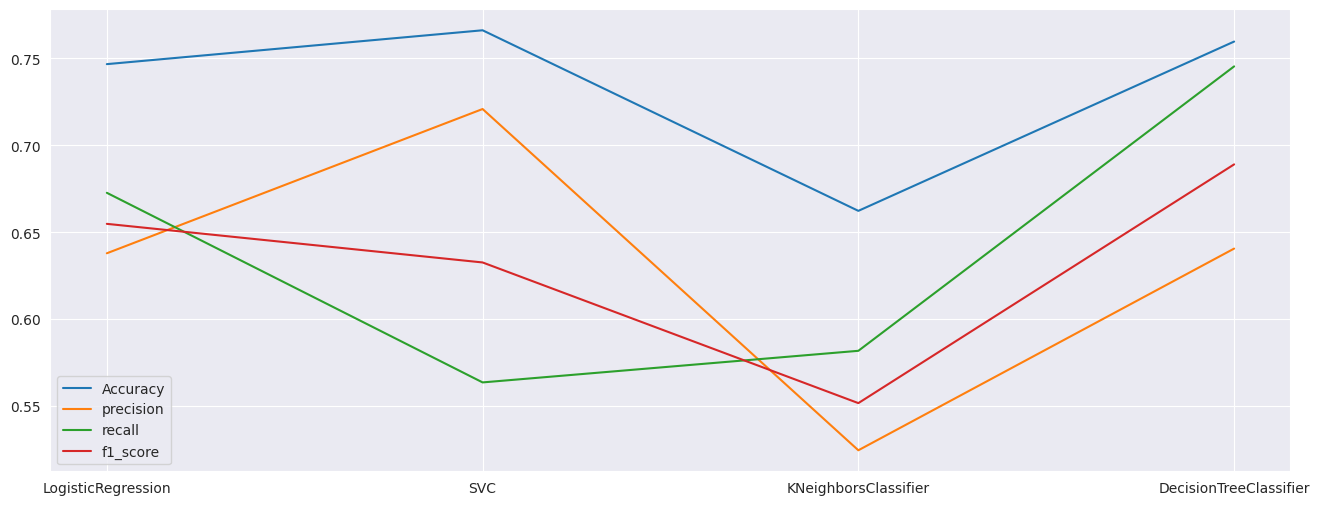

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(models_df.Algorithm,result1, label='Accuracy')
plt.plot(models_df.Algorithm,result2, label='precision')
plt.plot(models_df.Algorithm,result3, label='recall')
plt.plot(models_df.Algorithm,result4, label='f1_score')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
X = df.drop(columns=['Outcome'])  # Assuming 'Diabetes_Status' is the target variable
y = df['Outcome']

In [ ]:
# Normalize features (if needed)
from sklearn.preprocessing import StandardScaler
X_normalized = StandardScaler().fit_transform(X)

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_normalized)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Assign clusters to data points
cluster_labels = kmeans.labels_


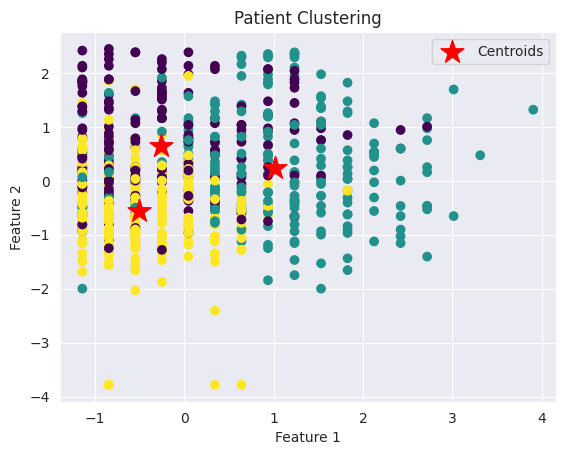

In [ ]:
# Visualize clusters (for 2D data)
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Patient Clustering')
plt.legend()
plt.show()

In [ ]:
cluster_data = {}
for i, label in enumerate(cluster_labels):
    if label not in cluster_data:
        cluster_data[label] = []
    cluster_data[label].append(i + 1)

for cluster, data_points in cluster_data.items():
    print(f"Cluster {cluster}: Data Points {data_points}")

Cluster 1: Data Points [1, 3, 10, 11, 12, 13, 15, 18, 22, 23, 24, 25, 26, 27, 29, 30, 31, 35, 37, 38, 42, 43, 44, 45, 49, 62, 65, 68, 73, 77, 83, 85, 87, 89, 93, 94, 116, 117, 124, 130, 132, 134, 141, 142, 144, 147, 149, 155, 160, 161, 162, 166, 171, 177, 179, 180, 185, 186, 192, 193, 194, 195, 205, 208, 210, 213, 215, 220, 222, 224, 231, 236, 237, 239, 246, 247, 251, 255, 260, 264, 266, 271, 273, 275, 279, 282, 283, 284, 285, 286, 295, 299, 300, 304, 305, 307, 315, 318, 320, 324, 328, 330, 331, 334, 338, 340, 344, 345, 346, 352, 356, 358, 359, 362, 363, 364, 367, 379, 387, 388, 392, 395, 402, 404, 405, 407, 409, 437, 438, 440, 444, 454, 456, 457, 460, 461, 463, 465, 474, 476, 478, 479, 480, 490, 494, 496, 499, 504, 506, 510, 511, 513, 517, 518, 519, 520, 524, 537, 538, 543, 553, 558, 559, 560, 561, 568, 579, 583, 584, 587, 591, 593, 599, 604, 615, 617, 619, 623, 629, 631, 635, 636, 637, 643, 649, 659, 661, 665, 667, 668, 670, 673, 675, 676, 677, 685, 691, 692, 702, 709, 712, 713, 718,

In [ ]:
# Assuming you have a list of class names
class_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

cluster_data = {}
for i, label in enumerate(cluster_labels):
    if label not in cluster_data:
        cluster_data[label] = []
    if i < len(class_names):  # Ensure index is within range of class_names
        cluster_data[label].append(class_names[i])


# Print cluster information
for cluster, class_names in cluster_data.items():
    print(f"Cluster {cluster}: Class Names {class_names}")

Cluster 1: Class Names ['Pregnancies', 'BloodPressure']
Cluster 2: Class Names ['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Cluster 0: Class Names ['Insulin', 'Outcome']


In [ ]:
import joblib

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display


In [ ]:
# Load the diabetes dataset
diabetes_data = pd.read_csv('/content/diabetes.csv')

In [ ]:
# Separate features and target
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train models
models = {
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "KMeans": KMeans(n_clusters=3),
    "Decision Tree": DecisionTreeClassifier(),
    "SelectKBest": SelectKBest(k=4),
    "Logistic Regression": LogisticRegression()
}


In [ ]:
for name, model in models.items():
    if name != "SelectKBest":
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

In [ ]:
def predict_diabetes(data, model):
    if model != "SelectKBest":
        data = scaler.transform([data])
    return models[model].predict(data)[0]


In [ ]:
def submit_data(b):
    data = [float(entry.value) for entry in entries]
    results = {}
    for name, model in models.items():
        if name == "SelectKBest":  # Skip SelectKBest for prediction
            continue
        prediction = predict_diabetes(data, name)
        results[name] = "Diabetic" if prediction == 1 else "Not Diabetic"

    result_text = "\n".join([f"{model}: {result}" for model, result in results.items()])
    print(result_text)

In [ ]:
# GUI
labels = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
entries = []
for label in labels:
    entry = widgets.FloatText(description=label)
    entries.append(entry)

submit_button = widgets.Button(description="Submit")
submit_button.on_click(submit_data)

display(widgets.VBox(entries + [submit_button]))

SVC: Diabetic
KNN: Diabetic
KMeans: Not Diabetic
Decision Tree: Diabetic
Logistic Regression: Diabetic
